In [18]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
import seaborn as sns

In [19]:
def LassoGD(y, tx, initial_w, lambda_, max_iters, gamma):
    """Gradient descent algorithm for Lasso"""
    # Define parameters to store w and loss
    ws = [initial_w]
    losses = []
    w = initial_w
    for n_iter in range(max_iters):
        # compute gradient and loss
        grad = compute_gradient_Lasso(y, tx, w, lambda_)
        loss = compute_loss_Lasso(y, tx, w, lambda_)
        # gradient w by descent update
        w = w - gamma * grad
        # store w and loss
        ws.append(w)
        losses.append(loss)
        # print("Gradient Descent({bi}/{ti}): loss={l}, w0={w0}, w1={w1}".format(
        #     bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]))
    return losses, ws

In [20]:
def compute_loss_Lasso(y, tx, w, lambda_):
    """Compute the loss."""
    e = y - tx.dot(w)
    loss = np.sum(e**2) / 2 + lambda_ * np.sum(np.abs(w))
    return loss

In [21]:
def compute_gradient_Lasso(y, tx, w, lambda_):
    """Compute the gradient."""
    e = y - tx.dot(w)
    grad = -tx.T.dot(e) + lambda_ * np.sign(w)
    return grad

In [22]:
def RidgeGD(y, tx, initial_w, lambda_, max_iters, gamma):
    """Gradient descent algorithm for Ridge"""
    # Define parameters to store w and loss
    ws = [initial_w]
    losses = []
    w = initial_w
    for n_iter in range(max_iters):
        # compute gradient and loss
        grad = compute_gradient_Ridge(y, tx, w, lambda_)
        loss = compute_loss_Ridge(y, tx, w, lambda_)
        # gradient w by descent update
        w = w - gamma * grad
        # store w and loss
        ws.append(w)
        losses.append(loss)
        # print("Gradient Descent({bi}/{ti}): loss={l}, w0={w0}, w1={w1}".format(
        #     bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]))
    return losses, ws

In [23]:
def compute_gradient_Ridge(y, tx, w, lambda_):
    """Compute the gradient."""
    e = y - tx.dot(w)
    grad = -tx.T.dot(e) + lambda_ * w
    return grad, e

In [24]:
def compute_loss_Ridge(y, tx, w, lambda_):
    """Compute the loss."""
    e = y - tx.dot(w)
    loss = np.sum(e**2) / 2 + lambda_ * np.sum(w**2)
    return loss

In [25]:
def ElasticNetGD(y, tx, initial_w, lambda_, max_iters, gamma, alpha):
    """Gradient descent algorithm for Elastic Net"""
    # Define parameters to store w and loss
    ws = [initial_w]
    losses = []
    w = initial_w
    for n_iter in range(max_iters):
        # compute gradient and loss
        grad = compute_gradient_ElasticNet(y, tx, w, lambda_, alpha)
        loss = compute_loss_ElasticNet(y, tx, w, lambda_, alpha)
        # gradient w by descent update
        w = w - gamma * grad
        # store w and loss
        ws.append(w)
        losses.append(loss)
        # print("Gradient Descent({bi}/{ti}): loss={l}, w0={w0}, w1={w1}".format(
        #     bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]))
    return losses, ws

In [26]:
def compute_loss_ElasticNet(y, tx, w, lambda_, alpha):
    """Compute the loss."""
    e = y - tx.dot(w)
    loss = np.sum(e**2) / 2 + lambda_ * (alpha * np.sum(np.abs(w)) + (1 - alpha) * np.sum(w**2)/2)
    return loss

In [27]:
def compute_gradient_ElasticNet(y, tx, w, lambda_, alpha):
    """Compute the gradient."""
    e = y - tx.dot(w)
    grad = -tx.T.dot(e) + lambda_ * (alpha * np.sign(w) + (1 - alpha) * w)
    return grad

In [28]:
def crossValidate(y, tx, k_fold, lambda_, max_iters, gamma, alpha):
    """ returns losses for each regularisation
    i.e Lasso, Ridge, Elastic Net
    """
    losses = []
    weights = []
    for i in range(k_fold):
        # split data into training and test set
        y_train, y_test = y[i*len(y)//k_fold:(i+1)*len(y)//k_fold], y[:i*len(y)//k_fold] + y[(i+1)*len(y)//k_fold:]
        tx_train, tx_test = tx[i*len(tx)//k_fold:(i+1)*len(tx)//k_fold], tx[:i*len(tx)//k_fold] + tx[(i+1)*len(tx)//k_fold:]
        # train model and predict
        losses_lasso, ws_lasso = LassoGD(y_train, tx_train, lambda_, max_iters, gamma)
        losses_ridge, ws_ridge = RidgeGD(y_train, tx_train, lambda_, max_iters, gamma)
        losses_elastic, ws_elastic = ElasticNetGD(y_train, tx_train, lambda_, max_iters, gamma, alpha)
        # append losses
        losses.append(losses_lasso)
        losses.append(losses_ridge)
        losses.append(losses_elastic)
        # append weights
        weights.append(ws_lasso)
        weights.append(ws_ridge)
        weights.append(ws_elastic)

    return losses, weights


In [29]:

n = 60
x = np.random.uniform(0, 10, n)

# a be any real number
a = 20
b = 10
e = np.random.normal(0, 1, n)*5

y = a * x + b + e


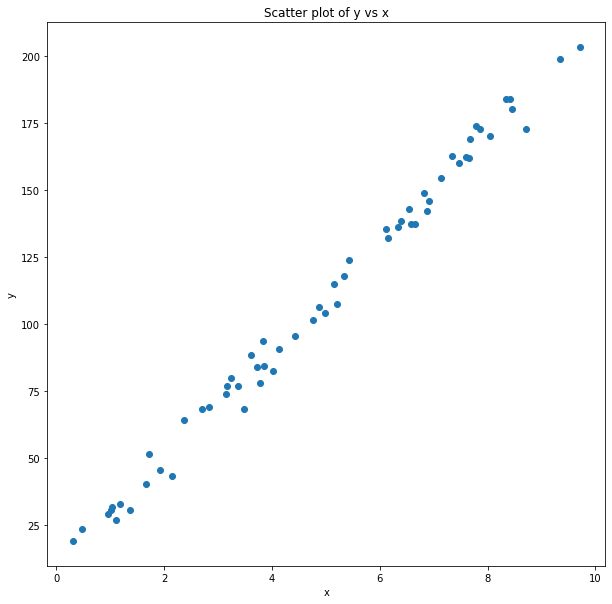

In [30]:
# plot the data
# figure size (width, height)
fig = plt.figure(figsize=(10, 10))


plt.grid(False)
plt.scatter(x, y)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Scatter plot of y vs x")
plt.show()

In [35]:
losses, weights = crossValidate(y, x, 6, 0.1, 10000, 0.01, 0.5)

ValueError: operands could not be broadcast together with shapes (0,) (50,) 